In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
import sklearn
from matplotlib import rcParams

from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import cluster

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 

from sklearn.svm import SVC

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)
#np.set_printoptions(threshold=sys.maxsize)

# Data Cleaning

In [2]:
filename = r'human_trafficking_2020.csv'
df = pd.read_csv(filename,sep=';')

#remplacement des valeurs -99 par nan
df.replace('-99', np.nan, inplace=True)
df.replace(-99, np.nan, inplace=True)

#remplacement des valeurs 0 par nan dans la colonne "CountryOfExploitation" et "citizenship"
df["CountryOfExploitation"].replace('0', np.nan, inplace=True)
df["citizenship"].replace('00', np.nan, inplace=True)

df.shape

(48801, 63)

In [3]:
#Liste de colonnes à valeur numérique
List_keep = ['yearOfRegistration','ageBroad','gender','citizenship',
       'CountryOfExploitation','typeOfExploitConcatenated','meansOfControlDebtBondage',
       'meansOfControlTakesEarnings', 'meansOfControlRestrictsFinancialAccess',
       'meansOfControlThreats', 'meansOfControlPsychologicalAbuse',
       'meansOfControlPhysicalAbuse', 'meansOfControlSexualAbuse',
       'meansOfControlFalsePromises', 'meansOfControlPsychoactiveSubstances',
       'meansOfControlRestrictsMovement', 'meansOfControlRestrictsMedicalCare',
       'meansOfControlExcessiveWorkingHours', 'meansOfControlUsesChildren',
       'meansOfControlThreatOfLawEnforcement',
       'meansOfControlWithholdsNecessities',
       'meansOfControlWithholdsDocuments', 'meansOfControlOther',
       'meansOfControlNotSpecified',
       'recruiterRelationIntimatePartner', 'recruiterRelationFriend',
       'recruiterRelationFamily', 'recruiterRelationOther',
       'recruiterRelationUnknown','Datasource']

df = df[List_keep]
df.head()

,yearOfRegistration,ageBroad,gender,citizenship,CountryOfExploitation,typeOfExploitConcatenated,meansOfControlDebtBondage,meansOfControlTakesEarnings,meansOfControlRestrictsFinancialAccess,meansOfControlThreats,meansOfControlPsychologicalAbuse,meansOfControlPhysicalAbuse,meansOfControlSexualAbuse,meansOfControlFalsePromises,meansOfControlPsychoactiveSubstances,meansOfControlRestrictsMovement,meansOfControlRestrictsMedicalCare,meansOfControlExcessiveWorkingHours,meansOfControlUsesChildren,meansOfControlThreatOfLawEnforcement,meansOfControlWithholdsNecessities,meansOfControlWithholdsDocuments,meansOfControlOther,meansOfControlNotSpecified,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown,Datasource
0,2002,18--20,Female,CO,NaN,Sexual exploitation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0,Case Management
1,2002,18--20,Female,CO,NaN,Sexual exploitation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0,Case Management
2,2002,18--20,Female,CO,NaN,Sexual exploitation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0,Case Management
3,2002,18--20,Female,CO,NaN,Sexual exploitation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0,Case Management
4,2002,18--20,Female,CO,NaN,Sexual exploitation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0,Case Management


In [4]:
df["typeOfExploitConcatenated"].unique()

array(['Sexual exploitation', nan, 'Forced labour', 'Other',
       'Forced labour;Other', 'Slavery and similar practices',
       'Forced marriage',
       'Forced labour;Sexual exploitation;Combined sexual and labour exploitation'],
      dtype=object)

In [5]:
# Suppressions des valeurs 'Forced labour;Sexual exploitation;Combined sexual and labour exploitation' et 'Forced labour;Other'
# Ces valeurs sont combinées et vont fausser notre classification

df = df.drop(df[df['typeOfExploitConcatenated'] == 'Forced labour;Sexual exploitation;Combined sexual and labour exploitation'].index)
df = df.drop(df[df['typeOfExploitConcatenated'] == 'Forced labour;Other'].index)
             
#Suppression des colonnes contenant uniquement des valeurs Nan
df.dropna(axis=1, how = 'all', inplace=True)

df.columns

Index(['yearOfRegistration', 'ageBroad', 'gender', 'citizenship',
       'CountryOfExploitation', 'typeOfExploitConcatenated',
       'meansOfControlDebtBondage', 'meansOfControlTakesEarnings',
       'meansOfControlRestrictsFinancialAccess', 'meansOfControlThreats',
       'meansOfControlPsychologicalAbuse', 'meansOfControlPhysicalAbuse',
       'meansOfControlSexualAbuse', 'meansOfControlFalsePromises',
       'meansOfControlPsychoactiveSubstances',
       'meansOfControlRestrictsMovement', 'meansOfControlRestrictsMedicalCare',
       'meansOfControlExcessiveWorkingHours', 'meansOfControlUsesChildren',
       'meansOfControlThreatOfLawEnforcement',
       'meansOfControlWithholdsNecessities',
       'meansOfControlWithholdsDocuments', 'meansOfControlOther',
       'meansOfControlNotSpecified', 'recruiterRelationIntimatePartner',
       'recruiterRelationFriend', 'recruiterRelationFamily',
       'recruiterRelationOther', 'recruiterRelationUnknown', 'Datasource'],
      dtype='object'

In [6]:
#Recherche des colonnes contenant des valeurs Nan
nan_values = df.isna().any()

print (nan_values)

yearOfRegistration                        False
ageBroad                                   True
gender                                    False
citizenship                                True
CountryOfExploitation                      True
typeOfExploitConcatenated                  True
meansOfControlDebtBondage                  True
meansOfControlTakesEarnings                True
meansOfControlRestrictsFinancialAccess     True
meansOfControlThreats                      True
meansOfControlPsychologicalAbuse           True
meansOfControlPhysicalAbuse                True
meansOfControlSexualAbuse                  True
meansOfControlFalsePromises                True
meansOfControlPsychoactiveSubstances       True
meansOfControlRestrictsMovement            True
meansOfControlRestrictsMedicalCare         True
meansOfControlExcessiveWorkingHours        True
meansOfControlUsesChildren                 True
meansOfControlThreatOfLawEnforcement       True
meansOfControlWithholdsNecessities      

In [7]:
#Pour la suite de l'ananlyse nous utiliserons les colonnes citizenship, gender, ageBroad et CountryOfExploitation 
#comme features et la colonne typeOfExploitConcatenated comme target
#Notre but étant de prédire les sévices subis par la victime en fonction des features

# Filtrage sur les Features ayant des Nan et la Target
df_filter = df 
Filtre = ['citizenship', 'ageBroad',
       'CountryOfExploitation','typeOfExploitConcatenated']
df_filter.dropna(subset=Filtre,inplace=True)
df_filter.reset_index(drop=True, inplace=True)

df_filter

,yearOfRegistration,ageBroad,gender,citizenship,CountryOfExploitation,typeOfExploitConcatenated,meansOfControlDebtBondage,meansOfControlTakesEarnings,meansOfControlRestrictsFinancialAccess,meansOfControlThreats,meansOfControlPsychologicalAbuse,meansOfControlPhysicalAbuse,meansOfControlSexualAbuse,meansOfControlFalsePromises,meansOfControlPsychoactiveSubstances,meansOfControlRestrictsMovement,meansOfControlRestrictsMedicalCare,meansOfControlExcessiveWorkingHours,meansOfControlUsesChildren,meansOfControlThreatOfLawEnforcement,meansOfControlWithholdsNecessities,meansOfControlWithholdsDocuments,meansOfControlOther,meansOfControlNotSpecified,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown,Datasource
0,2002,18--20,Female,MD,RS,Sexual exploitation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0,Case Management
1,2002,18--20,Female,MD,RS,Sexual exploitation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0,Case Management
2,2002,18--20,Female,MD,RS,Sexual exploitation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0,Case Management
3,2002,18--20,Female,MD,RS,Sexual exploitation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0,Case Management
4,2002,18--20,Female,MD,RS,Sexual exploitation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0,Case Management
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12777,2019,30--38,Female,UG,UG,Sexual exploitation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,Case Management
12778,2019,30--38,Female,UG,UG,Sexual exploitation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,Case Management
12779,2019,30--38,Female,UG,UG,Sexual exploitation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,Case Management
12780,2019,30--38,Female,UG,UG,Sexual exploitation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,Case Management


In [8]:
#Suite au filtrage, il n y a plus de Nan dans les Features et la Target
df_filter.isna().any()

yearOfRegistration                        False
ageBroad                                  False
gender                                    False
citizenship                               False
CountryOfExploitation                     False
typeOfExploitConcatenated                 False
meansOfControlDebtBondage                  True
meansOfControlTakesEarnings                True
meansOfControlRestrictsFinancialAccess     True
meansOfControlThreats                      True
meansOfControlPsychologicalAbuse           True
meansOfControlPhysicalAbuse                True
meansOfControlSexualAbuse                  True
meansOfControlFalsePromises                True
meansOfControlPsychoactiveSubstances       True
meansOfControlRestrictsMovement            True
meansOfControlRestrictsMedicalCare         True
meansOfControlExcessiveWorkingHours        True
meansOfControlUsesChildren                 True
meansOfControlThreatOfLawEnforcement       True
meansOfControlWithholdsNecessities      

In [9]:
#Creation d'un dataframe avec les Features et la Target
selected_columns = df_filter[['citizenship', 'gender', 'ageBroad',
       'CountryOfExploitation','typeOfExploitConcatenated']]
data = selected_columns.copy()
data.head()

,citizenship,gender,ageBroad,CountryOfExploitation,typeOfExploitConcatenated
0,MD,Female,18--20,RS,Sexual exploitation
1,MD,Female,18--20,RS,Sexual exploitation
2,MD,Female,18--20,RS,Sexual exploitation
3,MD,Female,18--20,RS,Sexual exploitation
4,MD,Female,18--20,RS,Sexual exploitation


# Exploratory Data Analysis

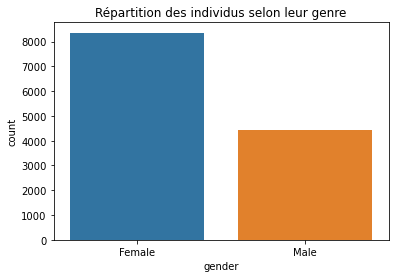

In [10]:
# Analyse du genre des individus présent dans le dataset
bar_gender = sns.countplot(x='gender', data=data).set_title('Répartition des individus selon leur genre')

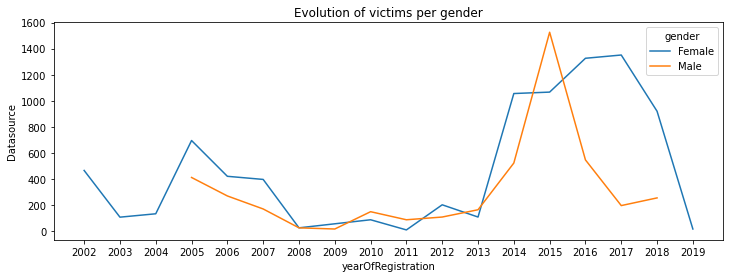

In [11]:
# Evolution des genres au fur et à mesure du temps
df_plot = df_filter.groupby(["yearOfRegistration","gender"]).count().reset_index()
df_plot.head()
plt.figure(figsize=(12,4))
df_plot["yearOfRegistration"] = df_plot["yearOfRegistration"].astype(str)
sns.lineplot(x='yearOfRegistration', y="Datasource", hue='gender', data=df_plot)
plt.title("Evolution of victims per gender")

plt.show()

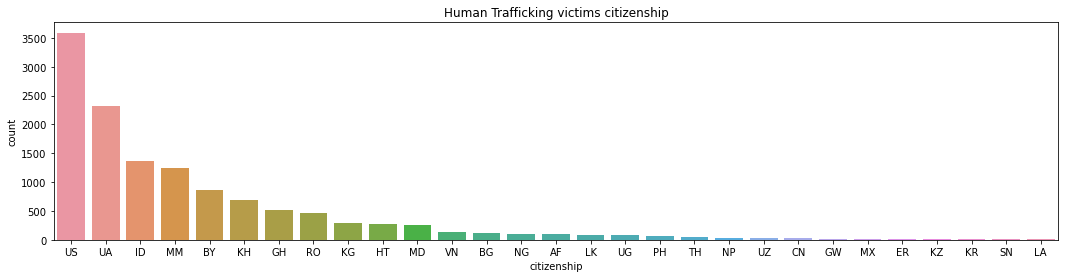

In [12]:
#Nationalité des victimes de trafic
plt.figure(figsize=(18,4))
bar_citizenship = sns.countplot(x="citizenship", data=data,order = data['citizenship'].value_counts().index).set_title('Human Trafficking victims citizenship')

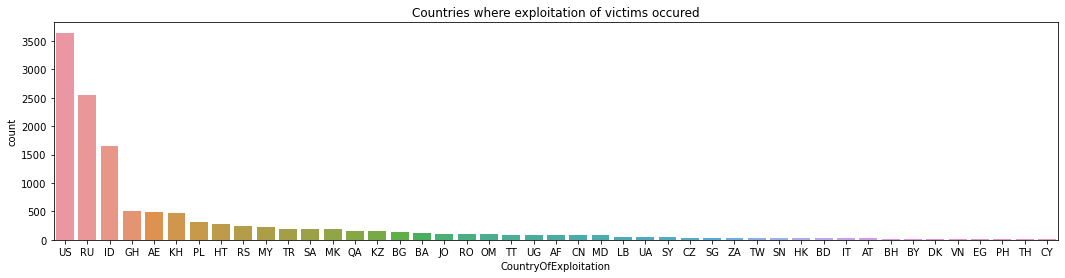

In [13]:
# Les pays où ont eu lieu les trafics
plt.figure(figsize=(18,4))
bar_CountryOfExploitation = sns.countplot(x="CountryOfExploitation", data=data,order = data['CountryOfExploitation'].value_counts().index).set_title('Countries where exploitation of victims occured')

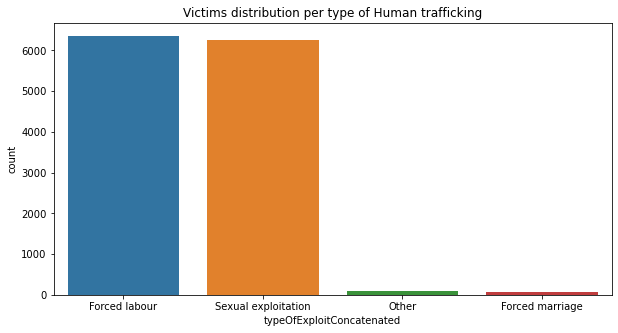

In [14]:
# Répartition des victimes par types de traffic subit
plt.figure(figsize=(10,5))
bar_CountryOfExploitation = sns.countplot(x="typeOfExploitConcatenated", data=data, order = data['typeOfExploitConcatenated'].value_counts().index).set_title('Victims distribution per type of Human trafficking')

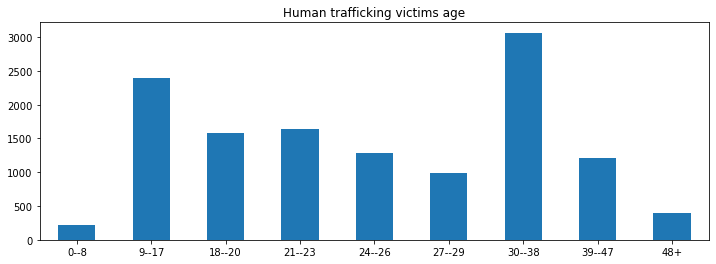

In [15]:
# Répartition de l'age des victimes
data["ageBroad"].value_counts().loc[['0--8','9--17','18--20','21--23','24--26','27--29','30--38','39--47','48+']].plot.bar(figsize=(12,4),sort_columns = False, title = 'Human trafficking victims age')
plt.xticks(rotation=0)
plt.show() 

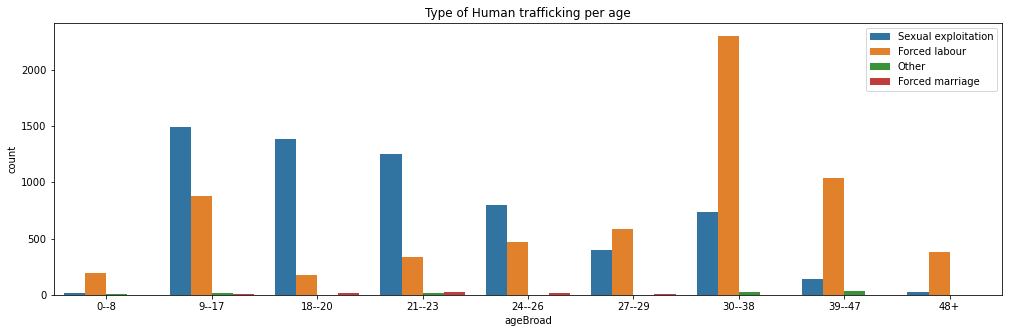

In [16]:
#Répartitions du types d'exploitation en fonction de l'âge
plt.figure(figsize=(17,5))
order = ['0--8','9--17','18--20','21--23','24--26','27--29','30--38','39--47','48+']
sns.countplot(x="ageBroad", hue="typeOfExploitConcatenated", order = order, data=data)
plt.title("Type of Human trafficking per age")
plt.legend(loc='upper right')
plt.show()

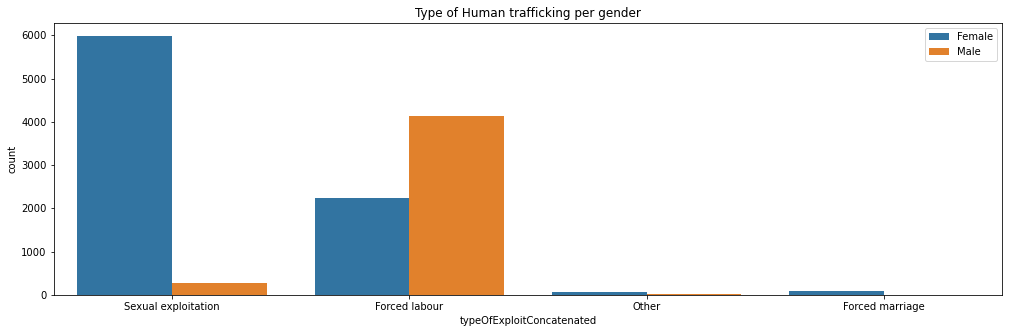

In [17]:
#Répartitions du types d'exploitation en fonction du sexe
plt.figure(figsize=(17,5))
sns.countplot(x="typeOfExploitConcatenated", hue="gender", data=data)
plt.title("Type of Human trafficking per gender")
plt.legend(loc='upper right')
plt.show()

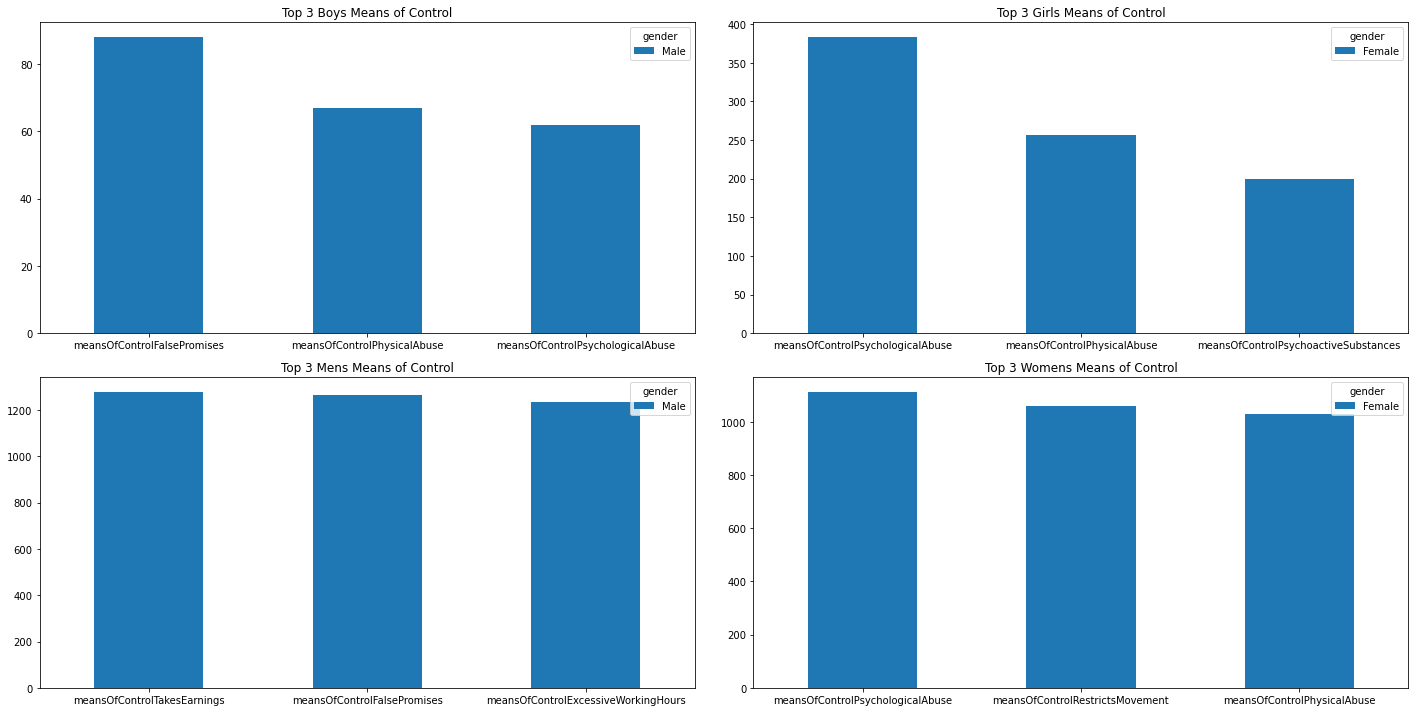

In [18]:
# Type de controle utilisé pour un Homme, Femme, Garcon, Fille
boys = df["gender"].loc[(df["gender"]== "Male") & (df["ageBroad"].isin(['0--8','9--17']))]
girls = df["gender"].loc[(df["gender"]== "Female") & (df["ageBroad"].isin(['0--8','9--17']))]
men = df["gender"].loc[(df["gender"]== "Male") & (df["ageBroad"].isin(['18--20','21--23','24--26','27--29','30--38','39--47','48+']))]
women = df["gender"].loc[(df["gender"]== "Female") & (df["ageBroad"].isin(['18--20','21--23','24--26','27--29','30--38','39--47','48+']))]

Type_control =["gender",'meansOfControlDebtBondage',
       'meansOfControlTakesEarnings', 'meansOfControlRestrictsFinancialAccess',
       'meansOfControlThreats', 'meansOfControlPsychologicalAbuse',
       'meansOfControlPhysicalAbuse', 'meansOfControlSexualAbuse',
       'meansOfControlFalsePromises', 'meansOfControlPsychoactiveSubstances',
       'meansOfControlRestrictsMovement', 'meansOfControlRestrictsMedicalCare',
       'meansOfControlExcessiveWorkingHours', 'meansOfControlUsesChildren',
       'meansOfControlThreatOfLawEnforcement',
       'meansOfControlWithholdsNecessities',
       'meansOfControlWithholdsDocuments', 'meansOfControlOther']

fig, axes = plt.subplots(nrows=2, ncols=2 , figsize=(20,10))
gp_boy = df[Type_control].groupby(boys).sum().T
gp_boy_sort = gp_boy.sort_values(by = 'Male', ascending=False).head(3)
gp_boy_sort.plot.bar(ax=axes[0, 0],sort_columns = False,rot=0, title = "Top 3 Boys Means of Control");



gp_girl = df[Type_control].groupby(girls).sum().T
gp_girl_sort = gp_girl.sort_values(by = 'Female', ascending=False).head(3)
gp_girl_sort.plot.bar(ax=axes[0, 1],sort_columns = False,rot=0, title = "Top 3 Girls Means of Control");



gp_men = df[Type_control].groupby(men).sum().T
gp_men_sort = gp_men.sort_values(by = 'Male', ascending=False).head(3)
gp_men_sort.plot.bar(ax=axes[1, 0],sort_columns = False,rot=0, title = "Top 3 Mens Means of Control");



gp_women = df[Type_control].groupby(women).sum().T
gp_women_sort = gp_women.sort_values(by = 'Female', ascending=False).head(3)
gp_women_sort.plot.bar(ax=axes[1, 1],sort_columns = False,rot=0, title = "Top 3 Womens Means of Control");


fig.tight_layout()
plt.show()

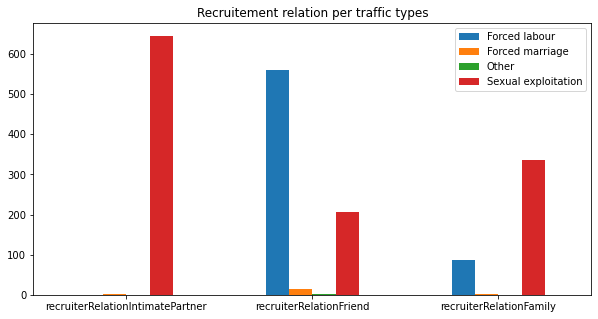

In [19]:
exploit= ["typeOfExploitConcatenated",'recruiterRelationIntimatePartner', 'recruiterRelationFriend', 'recruiterRelationFamily']
gr_exploit = df[exploit].groupby("typeOfExploitConcatenated").sum().T
gr_exploit.plot.bar(figsize=(10,5), title = "Recruitement relation per traffic types")
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

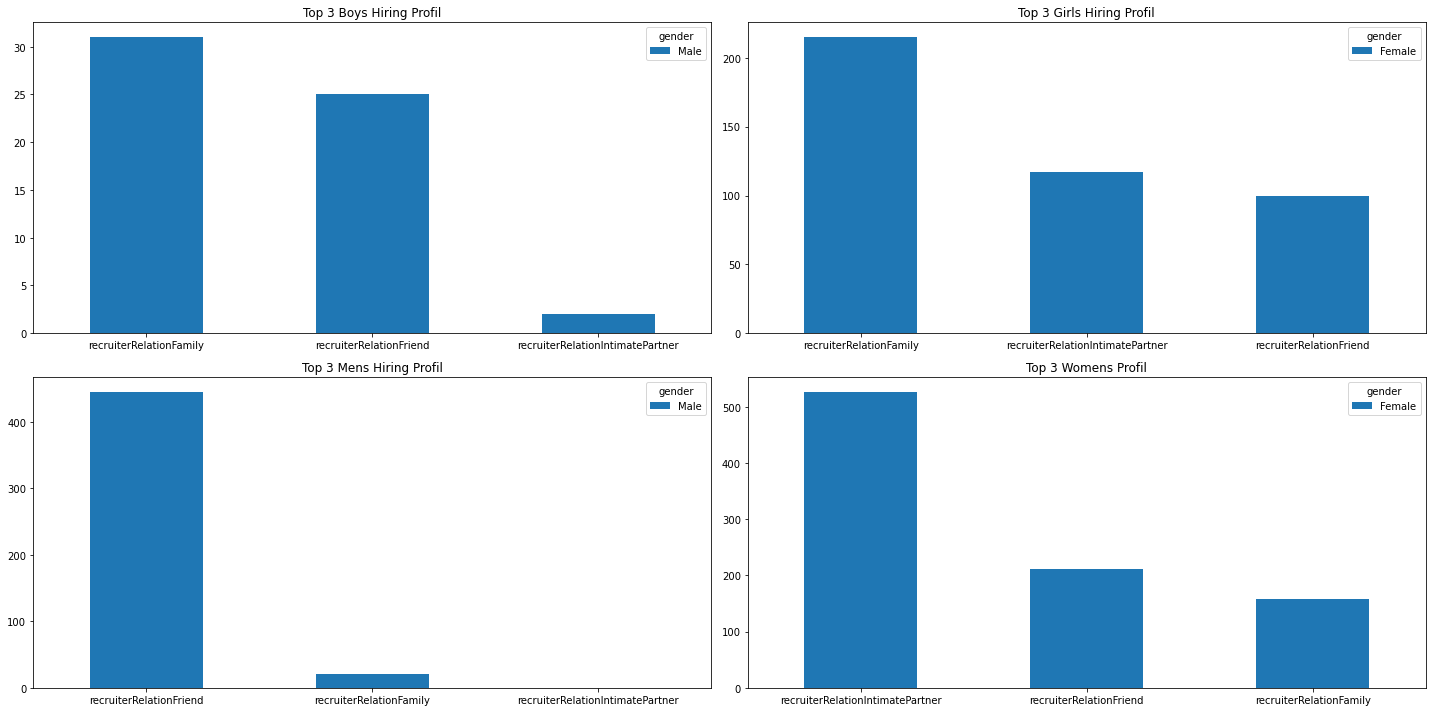

In [20]:
# Relation avec le recuteurs selon le fait d'être une fille, garcon, femme, homme

fig, axes = plt.subplots(nrows=2, ncols=2 , figsize=(20,10))
gp_boy = df[exploit].groupby(boys).sum().T
gp_boy_sort = gp_boy.sort_values(by = 'Male', ascending=False).head(3)
gp_boy_sort.plot.bar(ax=axes[0, 0],sort_columns = False,rot=0, title = "Top 3 Boys Hiring Profil");

gp_girl = df[exploit].groupby(girls).sum().T
gp_girl_sort = gp_girl.sort_values(by = 'Female', ascending=False).head(3)
gp_girl_sort.plot.bar(ax=axes[0, 1],sort_columns = False,rot=0, title = "Top 3 Girls Hiring Profil");

gp_men = df[exploit].groupby(men).sum().T
gp_men_sort = gp_men.sort_values(by = 'Male', ascending=False).head(3)
gp_men_sort.plot.bar(ax=axes[1, 0],sort_columns = False,rot=0, title = "Top 3 Mens Hiring Profil");

gp_women = df[exploit].groupby(women).sum().T
gp_women_sort = gp_women.sort_values(by = 'Female', ascending=False).head(3)
gp_women_sort.plot.bar(ax=axes[1, 1],sort_columns = False,rot=0, title = "Top 3 Womens Profil");

fig.tight_layout()
plt.show()

# Classification

In [21]:
#Creation d'un dataframe avec les Features et la Target
selected_columns = df_filter[['citizenship', 'gender', 'ageBroad',
       'CountryOfExploitation','typeOfExploitConcatenated']]
data_model = selected_columns.copy()
data_model.head()

,citizenship,gender,ageBroad,CountryOfExploitation,typeOfExploitConcatenated
0,MD,Female,18--20,RS,Sexual exploitation
1,MD,Female,18--20,RS,Sexual exploitation
2,MD,Female,18--20,RS,Sexual exploitation
3,MD,Female,18--20,RS,Sexual exploitation
4,MD,Female,18--20,RS,Sexual exploitation


In [22]:
data_model.shape

(12782, 5)

In [23]:
#Affichage du nombre de valeurs pour chaque colonne
Variables = []
for i in data.columns:
    Variables.append([i, data[i].nunique(), data[i].drop_duplicates().values])
pd.DataFrame(Variables, columns = ['Columns', 'Number of distinct values', 'Values'])

,Columns,Number of distinct values,Values
0,citizenship,29,"[MD, RO, UA, BY, GH, BG, ID, GW, KG, SN, LA, K..."
1,gender,2,"[Female, Male]"
2,ageBroad,9,"[18--20, 21--23, 24--26, 27--29, 30--38, 9--17..."
3,CountryOfExploitation,45,"[RS, BA, MK, RU, MD, AE, CY, GH, BG, IT, RO, T..."
4,typeOfExploitConcatenated,4,"[Sexual exploitation, Forced labour, Other, Fo..."


In [24]:
#Focus sur les valeurs de la target
data_model["typeOfExploitConcatenated"].value_counts()

Forced labour          6355
Sexual exploitation    6249
Other                    99
Forced marriage          79
Name: typeOfExploitConcatenated, dtype: int64

In [25]:
#Conversion des variables de la Target en integer
#A titre de simplification, les variables Forced labour;Sexual exploitation;Combined sexual and labour exploitation 
#et Forced labour;Other seront ajoutées à la variable Forced labour

data_model['typeOfExploitConcatenated'] = data_model['typeOfExploitConcatenated'].map({'Forced labour':1, 'Sexual exploitation':2, 'Other':3, 'Forced marriage' :4})

data_model["typeOfExploitConcatenated"].value_counts()

1    6355
2    6249
3      99
4      79
Name: typeOfExploitConcatenated, dtype: int64

In [26]:
#Isolation des features qui disposent toutes de valeurs catégorielles
df_feat = data_model[['citizenship', 'gender', 'ageBroad','CountryOfExploitation']]

#Encodage des valeurs catégorielles
Encoding_var = pd.get_dummies(df_feat)
Encoding_var.head()

,citizenship_AF,citizenship_BG,citizenship_BY,citizenship_CN,citizenship_ER,citizenship_GH,citizenship_GW,citizenship_HT,citizenship_ID,citizenship_KG,citizenship_KH,citizenship_KR,citizenship_KZ,citizenship_LA,citizenship_LK,citizenship_MD,citizenship_MM,citizenship_MX,citizenship_NG,citizenship_NP,citizenship_PH,citizenship_RO,citizenship_SN,citizenship_TH,citizenship_UA,citizenship_UG,citizenship_US,citizenship_UZ,citizenship_VN,gender_Female,gender_Male,ageBroad_0--8,ageBroad_18--20,ageBroad_21--23,ageBroad_24--26,ageBroad_27--29,ageBroad_30--38,ageBroad_39--47,ageBroad_48+,ageBroad_9--17,CountryOfExploitation_AE,CountryOfExploitation_AF,CountryOfExploitation_AT,CountryOfExploitation_BA,CountryOfExploitation_BD,CountryOfExploitation_BG,CountryOfExploitation_BH,CountryOfExploitation_BY,CountryOfExploitation_CN,CountryOfExploitation_CY,CountryOfExploitation_CZ,CountryOfExploitation_DK,CountryOfExploitation_EG,CountryOfExploitation_GH,CountryOfExploitation_HK,CountryOfExploitation_HT,CountryOfExploitation_ID,CountryOfExploitation_IT,CountryOfExploitation_JO,CountryOfExploitation_KH,CountryOfExploitation_KZ,CountryOfExploitation_LB,CountryOfExploitation_MD,CountryOfExploitation_MK,CountryOfExploitation_MY,CountryOfExploitation_OM,CountryOfExploitation_PH,CountryOfExploitation_PL,CountryOfExploitation_QA,CountryOfExploitation_RO,CountryOfExploitation_RS,CountryOfExploitation_RU,CountryOfExploitation_SA,CountryOfExploitation_SG,CountryOfExploitation_SN,CountryOfExploitation_SY,CountryOfExploitation_TH,CountryOfExploitation_TR,CountryOfExploitation_TT,CountryOfExploitation_TW,CountryOfExploitation_UA,CountryOfExploitation_UG,CountryOfExploitation_US,CountryOfExploitation_VN,CountryOfExploitation_ZA
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
scaler = preprocessing.StandardScaler()
X_normalized = scaler.fit_transform(Encoding_var)
X_normalized

array([[-0.08744614, -0.09569941, -0.26874799, ..., -0.63160703,
        -0.03540239, -0.05314523],
       [-0.08744614, -0.09569941, -0.26874799, ..., -0.63160703,
        -0.03540239, -0.05314523],
       [-0.08744614, -0.09569941, -0.26874799, ..., -0.63160703,
        -0.03540239, -0.05314523],
       ...,
       [-0.08744614, -0.09569941, -0.26874799, ..., -0.63160703,
        -0.03540239, -0.05314523],
       [-0.08744614, -0.09569941, -0.26874799, ..., -0.63160703,
        -0.03540239, -0.05314523],
       [-0.08744614, -0.09569941, -0.26874799, ..., -0.63160703,
        -0.03540239, -0.05314523]])

**Data Split**

In [28]:
#Nous allons diviser le jeu de données entre Train et Test 

X = X_normalized
y = data_model["typeOfExploitConcatenated"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print ("La taille du jeu de données pour entraînement est: ")
print ("Features: " + str(X_train.shape) +"\n"+ "Target: " + str(y_train.shape))
print ("La taille du jeu de données pour test est: ")
print ("Features: " + str(X_train.shape) +"\n"+ "Target: " + str(y_test.shape))

La taille du jeu de données pour entraînement est: 
Features: (8947, 85)
Target: (8947,)
La taille du jeu de données pour test est: 
Features: (8947, 85)
Target: (3835,)


**Random Forest**

In [29]:
X_train_RF = X_train
X_test_RF = X_test
y_train_RF = y_train
y_test_RF = y_test

#Application de la méthode Random Forest
RF = RandomForestClassifier(random_state=1)
RF.fit(X_train_RF, y_train_RF)

RandomForestClassifier(random_state=1)

In [30]:
#Prédiction de la target suite à l'application de la méthode Random Forest
y_RF = RF.predict(X_test_RF)

y_RF

array([2, 2, 3, ..., 2, 2, 1], dtype=int64)

In [31]:
#Affichage des metrics sur la méthode Random Forest
print(classification_report(y_test_RF,y_RF))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99      1950
           2       0.99      0.99      0.99      1829
           3       1.00      0.88      0.94        33
           4       1.00      1.00      1.00        23

    accuracy                           0.99      3835
   macro avg       1.00      0.97      0.98      3835
weighted avg       0.99      0.99      0.99      3835



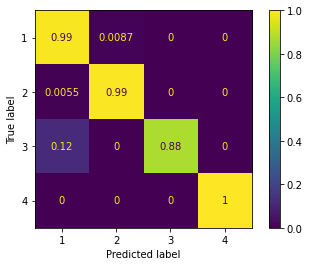

In [32]:
#Affichage de la matrice de confusion
plot_confusion_matrix(RF, X_test_RF, y_test_RF, normalize="true")

Text(0.5, 1.0, 'Features Importance')

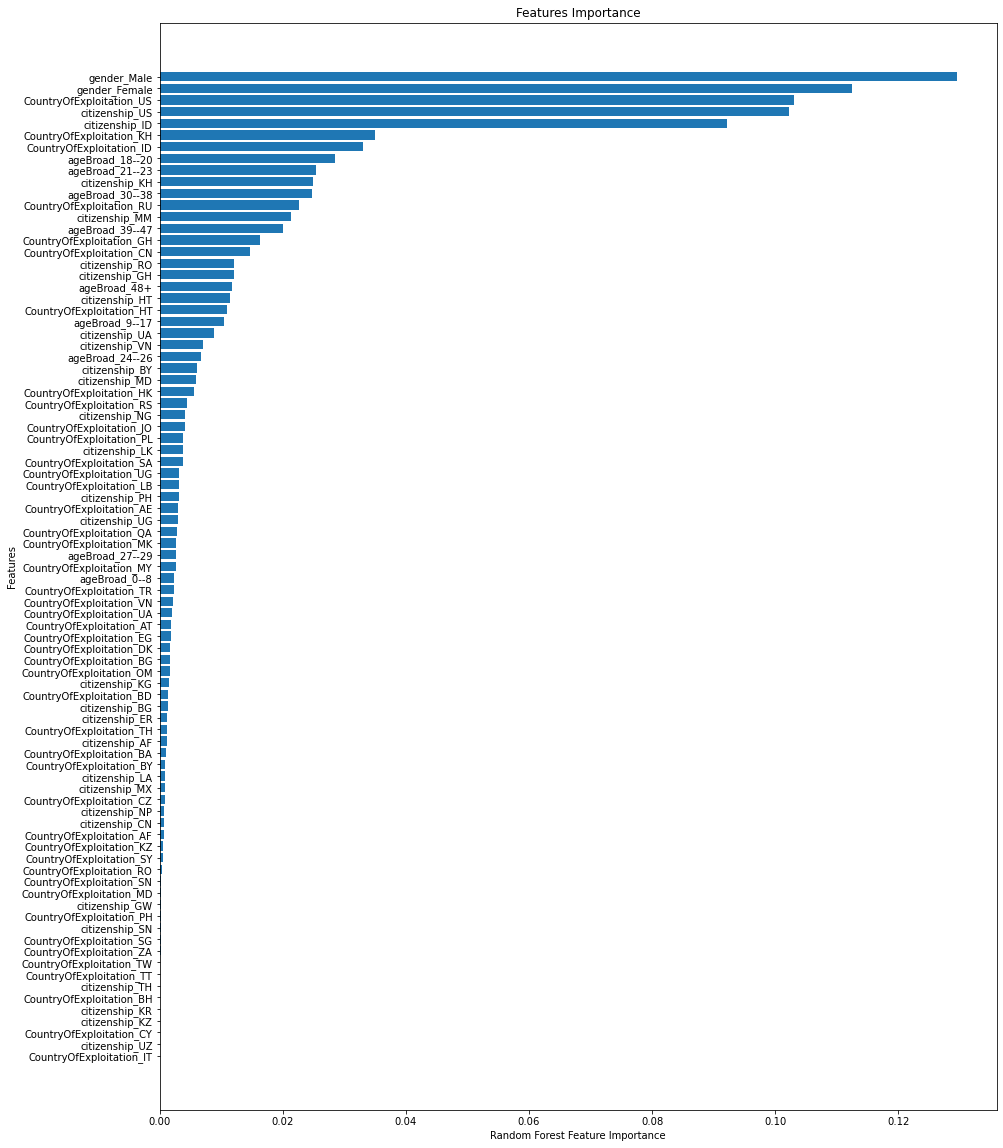

In [33]:
#Graphique de l'importance de chaque Feature
RF.feature_importances_

sorted_idx = RF.feature_importances_.argsort()
plt.figure(figsize=(15,20))
plt.barh(Encoding_var.columns[sorted_idx], RF.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.ylabel("Features")
plt.title("Features Importance")



In [34]:
#Calcul de précision du la methode Random Forest
Precision_RF = accuracy_score(y_test_RF ,y_RF)

print('Accuracy Score: ' + str(Precision_RF))

Accuracy Score: 0.991916558018253


**Logistic Regression**

In [35]:
X_train_LR = X_train
X_test_LR = X_test
y_train_LR = y_train
y_test_LR = y_test

#Initiation du modèle Logistic Regression puis fit sur le jeu de données Train
LR = LogisticRegression()
LR.fit(X_train_LR,y_train_LR)

C:\Users\urian\OneDrive\Documents\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
#Prédiction de la target à l'aide de la méthode
y_LR= LR.predict(X_test)

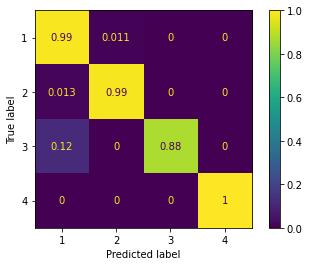

In [37]:
#Affichage de la matrice de confusion
plot_confusion_matrix(LR, X_test_LR, y_test_LR, normalize="true")

In [38]:
#Affichage des metrics sur la méthode Logistic Regression
print(classification_report(y_test_LR,y_LR))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99      1950
           2       0.99      0.99      0.99      1829
           3       1.00      0.88      0.94        33
           4       1.00      1.00      1.00        23

    accuracy                           0.99      3835
   macro avg       0.99      0.96      0.98      3835
weighted avg       0.99      0.99      0.99      3835



In [39]:
#Calcul de précision du la methode
Precision_LR = accuracy_score(y_test_LR ,y_LR)

print('Accuracy Score: ' + str(Precision_LR))

Accuracy Score: 0.9872229465449804


**SVM Linear kernel**

In [40]:
X_train_SVM_linear = X_train
X_test_SVM_linear = X_test
y_train_SVM_linear = y_train
y_test_SVM_linear = y_test

#Utilisation du modèle SVM avec un kernel linéaire
SVM=SVC(kernel='linear')
SVM.fit(X_train_SVM_linear,y_train_SVM_linear)
y_SVM_linear=SVM.predict(X_test_SVM_linear)


In [41]:
#Affichage des metrics sur la méthode Logistic Regression
print(classification_report(y_test_SVM_linear,y_SVM_linear))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99      1950
           2       0.99      0.99      0.99      1829
           3       1.00      0.88      0.94        33
           4       1.00      1.00      1.00        23

    accuracy                           0.99      3835
   macro avg       0.99      0.96      0.98      3835
weighted avg       0.99      0.99      0.99      3835



In [42]:
#Calcul de précision du la methode
Precision_SVM_Linear = accuracy_score(y_test_SVM_linear,y_SVM_linear)

print('Accuracy Score: ' + str(Precision_SVM_Linear))

Accuracy Score: 0.988787483702738


**SVM Radial Kernel**

In [43]:
X_train_SVM_radial = X_train
X_test_SVM_radial = X_test
y_train_SVM_radial = y_train
y_test_SVM_radial = y_test

#Utilisation du modèle SVM avec un kernel radial
SVM=SVC(kernel='rbf')
SVM.fit(X_train_SVM_radial,y_train_SVM_radial)
y_SVM_radial=SVM.predict(X_test_SVM_radial)

In [44]:
#Affichage des metrics sur la méthode
print(classification_report(y_test_SVM_radial,y_SVM_radial))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99      1950
           2       0.99      0.99      0.99      1829
           3       1.00      0.88      0.94        33
           4       1.00      1.00      1.00        23

    accuracy                           0.99      3835
   macro avg       1.00      0.97      0.98      3835
weighted avg       0.99      0.99      0.99      3835



In [45]:
#Calcul de précision du la methode
Precision_SVM_radial = accuracy_score(y_test_SVM_radial,y_SVM_radial)

print('Accuracy Score: ' + str(Precision_SVM_radial))

Accuracy Score: 0.991916558018253


**SVM Polynomial Kernel**

In [46]:
X_train_SVM_polynomial = X_train
X_test_SVM_polynomial = X_test
y_train_SVM_polynomial = y_train
y_test_SVM_polynomial = y_test

#Utilisation du modèle SVM avec un kernel polynomial
SVM=SVC(kernel='poly')
SVM.fit(X_train_SVM_polynomial,y_train_SVM_polynomial)
y_SVM_polynomial=SVM.predict(X_test_SVM_polynomial)

In [47]:
#Affichage des metrics sur la méthode Logistic Regression
print(classification_report(y_test_SVM_polynomial,y_SVM_polynomial))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99      1950
           2       0.98      0.99      0.99      1829
           3       1.00      0.88      0.94        33
           4       1.00      1.00      1.00        23

    accuracy                           0.99      3835
   macro avg       0.99      0.96      0.98      3835
weighted avg       0.99      0.99      0.99      3835



In [48]:
#Calcul de précision du la methode
Precision_SVM_polynomial = accuracy_score(y_test_SVM_polynomial,y_SVM_polynomial)

print('Accuracy Score: ' + str(Precision_SVM_polynomial))

Accuracy Score: 0.988787483702738


**Model Comparison**

In [49]:
Comparison_models = pd.DataFrame({
    'Model' : ['Random Forest Classifier', 'Logistic Regression','SVM linear Kernel','SVM radial Kernel', 'SVM polynomial Kernel'],
    'Accuracy' : [Precision_RF,Precision_LR,Precision_SVM_Linear,Precision_SVM_radial,Precision_SVM_polynomial],
    'F1':[f1_score(y_test_RF, y_RF, average='weighted'), f1_score(y_test_LR, y_LR, average='weighted'), f1_score(y_test_SVM_linear, y_SVM_linear, average='weighted'), f1_score(y_test_SVM_radial, y_SVM_radial, average='weighted'), f1_score(y_test_SVM_polynomial, y_SVM_polynomial, average='weighted')],
    'Recall': [recall_score(y_test_RF, y_RF, average='weighted'), recall_score(y_test_LR, y_LR, average='weighted'), recall_score(y_test_SVM_linear, y_SVM_linear, average='weighted'), recall_score(y_test_SVM_radial, y_SVM_radial, average='weighted'), recall_score(y_test_SVM_polynomial, y_SVM_polynomial, average='weighted')],
    'Precision' : [precision_score(y_test_RF, y_RF, average='weighted'), precision_score(y_test_LR, y_LR, average='weighted'), precision_score(y_test_SVM_linear, y_SVM_linear, average='weighted'), precision_score(y_test_SVM_radial, y_SVM_radial, average='weighted'), precision_score(y_test_SVM_polynomial, y_SVM_polynomial, average='weighted')]
    })


Comparison_models.sort_values(by = 'Accuracy', ascending = False)

,Model,Accuracy,F1,Recall,Precision
0,Random Forest Classifier,0.991917,0.991887,0.991917,0.991928
3,SVM radial Kernel,0.991917,0.991887,0.991917,0.991928
2,SVM linear Kernel,0.988787,0.988759,0.988787,0.988800
4,SVM polynomial Kernel,0.988787,0.988758,0.988787,0.988837
1,Logistic Regression,0.987223,0.987196,0.987223,0.987240


On observe que c'est avec le Random Forest Classifier et le SVM Radial Kernel que l'on obtient les meilleurs résultats